# Check PCP and sPCP low-rank component data distributions

In [1]:
import os
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

## Load MVBS data

In [2]:
MVBS_path = '/Users/wu-jung/code_git/ooi_sonar/zplsc_data_2015fall/nc_MVBS_envFromFile/'
MVBS_file = '20150817-20151017_MVBS_time_from_Sv_rangeBin5_all.nc'

In [3]:
MVBS = xr.open_dataset(os.path.join(MVBS_path, MVBS_file))
MVBS

<xarray.Dataset>
Dimensions:    (frequency: 3, ping_time: 8928, range_bin: 41)
Coordinates:
  * range_bin  (range_bin) int64 0 1 2 3 4 5 6 7 8 ... 33 34 35 36 37 38 39 40
  * frequency  (frequency) float32 120000.0 38000.0 200000.0
  * ping_time  (ping_time) datetime64[ns] 2015-08-17 ... 2015-10-17T23:16:40
Data variables:
    MVBS       (range_bin, ping_time, frequency) float64 ...
    range      (ping_time, range_bin) float64 ...

### MVBS data distribution

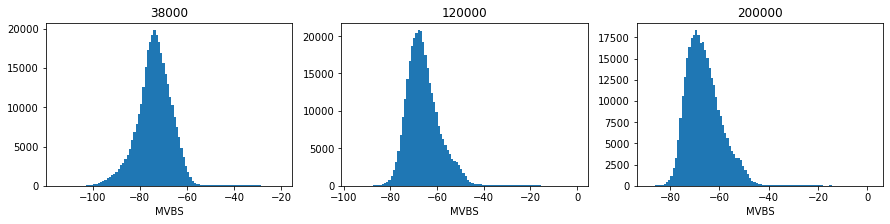

In [23]:
fig, ax = plt.subplots(1,3,figsize=(15,3))
for ifreq, freq in enumerate([38000, 120000, 200000]):
    MVBS['MVBS'].sel(frequency=freq).isel(range_bin=slice(1,38)).plot.hist(ax=ax[ifreq], bins=100)
    ax[ifreq].set_title(freq)

In [18]:
MVBS['MVBS'].sel(frequency=freq).isel(range_bin=slice(1,38))

<xarray.DataArray 'MVBS' (range_bin: 37, ping_time: 8928)>
[330336 values with dtype=float64]
Coordinates:
  * range_bin  (range_bin) int64 1 2 3 4 5 6 7 8 9 ... 30 31 32 33 34 35 36 37
    frequency  float32 200000.0
  * ping_time  (ping_time) datetime64[ns] 2015-08-17 ... 2015-10-17T23:16:40

## Load PCP and sPCP results

In [26]:
MVBS_PCP_path = '/Users/wu-jung/code_git/ooi_sonar/zplsc_data_2015fall/nc_PCP_envFromFile/'
MVBS_rpca_file = '20150817-20151017_MVBS_time_from_Sv_rangeBin5_rpca.nc'
MVBS_spcp_file = '20150817-20151017_MVBS_time_from_Sv_rangeBin5_spcp.nc'

In [27]:
MVBS_rpca = xr.open_dataset(os.path.join(MVBS_PCP_path, MVBS_rpca_file))
MVBS_rpca

<xarray.Dataset>
Dimensions:    (date: 62, depth: 37, frequency: 3, hour: 144)
Coordinates:
  * date       (date) datetime64[ns] 2015-08-17 2015-08-18 ... 2015-10-17
  * frequency  (frequency) int64 38000 120000 200000
  * depth      (depth) float64 184.0 179.0 174.0 169.0 ... 14.91 9.943 4.972
  * hour       (hour) float64 0.0 0.1667 0.3333 0.5 ... 23.33 23.5 23.67 23.83
Data variables:
    low_rank   (date, frequency, depth, hour) float64 ...
    sparse     (date, frequency, depth, hour) float64 ...

In [28]:
MVBS_spcp = xr.open_dataset(os.path.join(MVBS_PCP_path, MVBS_spcp_file))
MVBS_spcp

<xarray.Dataset>
Dimensions:    (date: 62, depth: 37, frequency: 3, hour: 144)
Coordinates:
  * date       (date) datetime64[ns] 2015-08-17 2015-08-18 ... 2015-10-17
  * frequency  (frequency) int64 38000 120000 200000
  * depth      (depth) float64 184.0 179.0 174.0 169.0 ... 14.91 9.943 4.972
  * hour       (hour) float64 0.0 0.1667 0.3333 0.5 ... 23.33 23.5 23.67 23.83
Data variables:
    low_rank   (date, frequency, depth, hour) float64 ...
    sparse     (date, frequency, depth, hour) float64 ...

### PCP low-rank component distribution

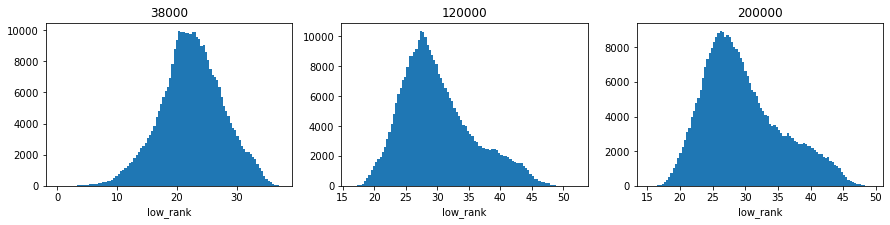

In [32]:
fig, ax = plt.subplots(1,3,figsize=(15,3))
for ifreq, freq in enumerate([38000, 120000, 200000]):
    (MVBS_spcp['low_rank']-MVBS_spcp['low_rank'].min()).sel(frequency=freq).plot.hist(ax=ax[ifreq], bins=100)
    ax[ifreq].set_title(freq)

### sPCP low-rank component distribution

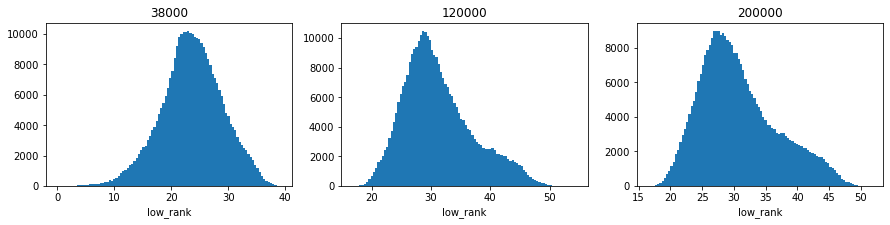

In [33]:
fig, ax = plt.subplots(1,3,figsize=(15,3))
for ifreq, freq in enumerate([38000, 120000, 200000]):
    (MVBS_rpca['low_rank']-MVBS_rpca['low_rank'].min()).sel(frequency=freq).plot.hist(ax=ax[ifreq], bins=100)
    ax[ifreq].set_title(freq)